# Data from HAN, since Jan 2021
Since Jan 2021, data from charging poles have been recorded. Power can be calculated from V and I.

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
data0121 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_011121.csv')
data0221 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_020121.csv')
data0321 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_030121.csv')
data0421 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_040121.csv')
data0521 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_050121.csv')
data0621 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_060121.csv')
data0721 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_070121.csv')
data0821 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_080121.csv')
data0921 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_090121.csv')
data1021 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_100121.csv')
data1121 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_110121.csv')
data1221 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_120121.csv')
data0122 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_010122.csv')
data0222 = pd.read_csv(r'../Data_HAN/Data_csv/measurements_020122.csv')

In [4]:
data = pd.concat([data0121,data0221,data0321,data0421,data0521,data0621,data0721,data0821,data0921,data1021,data1121,data1221,data0122,data0222])

In [5]:
data

,V1,V2,V3,I1,I2,I3,P,E,F,Time,SoC,socketId,userId,userName,carId,carName
0,232.790000,221.780000,0.000000,5.500000,5.0,2.0,0.0,0.0,50.021100,1606395726,NaN,2,No ID,unknown,1,NIssan Leaf
1,232.790000,221.780000,0.000000,5.500000,5.0,2.0,0.0,0.0,50.021100,1606395726,NaN,2,No ID,unknown,404,- -
2,225.623032,229.307861,229.752029,15.090841,0.0,0.0,NaN,NaN,50.045856,1607419478,NaN,1,No ID,unknown,404,- -
3,225.653503,229.340149,229.879105,15.047119,0.0,0.0,NaN,NaN,50.054367,1607419508,NaN,1,No ID,unknown,404,- -
4,225.965988,229.547592,229.955185,15.034362,0.0,0.0,NaN,NaN,50.026932,1607419538,NaN,1,No ID,unknown,404,- -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315231,233.496719,233.193848,232.661682,0.000000,0.0,0.0,NaN,NaN,49.992325,1643677341,NaN,3,NO ID,unknown,15,- -
315232,232.316650,233.075394,233.334839,0.000000,0.0,0.0,NaN,NaN,50.012215,1643677370,NaN,2,NO ID,unknown,15,- -
315233,232.366928,233.071945,233.318848,0.000000,0.0,0.0,NaN,NaN,50.019127,1643677383,NaN,1,NO ID,unknown,15,- -
315234,233.622818,233.186905,232.376389,0.000000,0.0,0.0,NaN,NaN,50.039127,1643677371,NaN,4,NO ID,unknown,15,- -


In [6]:
data.reset_index(drop=True, inplace=True)

Unnecessary data are dropped out of the table.

In [7]:
data.drop(['P','E','F','SoC','socketId','userId','userName','carId','carName'], axis=1, inplace=True)
data

,V1,V2,V3,I1,I2,I3,Time
0,232.790000,221.780000,0.000000,5.500000,5.0,2.0,1606395726
1,232.790000,221.780000,0.000000,5.500000,5.0,2.0,1606395726
2,225.623032,229.307861,229.752029,15.090841,0.0,0.0,1607419478
3,225.653503,229.340149,229.879105,15.047119,0.0,0.0,1607419508
4,225.965988,229.547592,229.955185,15.034362,0.0,0.0,1607419538
...,...,...,...,...,...,...,...
3693141,233.496719,233.193848,232.661682,0.000000,0.0,0.0,1643677341
3693142,232.316650,233.075394,233.334839,0.000000,0.0,0.0,1643677370
3693143,232.366928,233.071945,233.318848,0.000000,0.0,0.0,1643677383
3693144,233.622818,233.186905,232.376389,0.000000,0.0,0.0,1643677371


Incorrect data are replaced by values from nearby rows.

In [8]:
for i in range(len(data)):
    if (data.loc[i,'V1'] < -300) or (data.loc[i,'V1'] > 300):
        data.loc[i,'V1'] = data.loc[i-1,'V1']
    if (data.loc[i,'V2'] < -300) or (data.loc[i,'V2'] > 300):
        data.loc[i,'V2'] = data.loc[i-1,'V2']
    if (data.loc[i,'V3'] < -300) or (data.loc[i,'V3'] > 300):
        data.loc[i,'V3'] = data.loc[i-1,'V3']
        
    if (data.loc[i,'I1'] < -30) or (data.loc[i,'I1'] > 30):
        data.loc[i,'I1'] = data.loc[i-1,'I1']
    if (data.loc[i,'I2'] < -30) or (data.loc[i,'I2'] > 30):
        data.loc[i,'I2'] = data.loc[i-1,'I2']
    if (data.loc[i,'I3'] < -30) or (data.loc[i,'I3'] > 30):
        data.loc[i,'I3'] = data.loc[i-1,'I3']

In [9]:
power_data = data[['V1','V2','V3','I1','I2','I3','Time']]

$P = V_1\times I_1+V_2\times I_2+V_3\times I_3$

In [10]:
power=[]
for i in range(len(power_data)):
    power.append(power_data['V1'][i]*power_data['I1'][i] + power_data['V2'][i]*power_data['I2'][i] + power_data['V3'][i]*power_data['I3'][i])
power_data.loc[:,'Power'] = power

In [11]:
power_data

,V1,V2,V3,I1,I2,I3,Time,Power
0,232.790000,221.780000,0.000000,5.500000,5.0,2.0,1606395726,2389.245000
1,232.790000,221.780000,0.000000,5.500000,5.0,2.0,1606395726,2389.245000
2,225.623032,229.307861,229.752029,15.090841,0.0,0.0,1607419478,3404.841302
3,225.653503,229.340149,229.879105,15.047119,0.0,0.0,1607419508,3395.435112
4,225.965988,229.547592,229.955185,15.034362,0.0,0.0,1607419538,3397.254463
...,...,...,...,...,...,...,...,...
3693141,233.496719,233.193848,232.661682,0.000000,0.0,0.0,1643677341,0.000000
3693142,232.316650,233.075394,233.334839,0.000000,0.0,0.0,1643677370,0.000000
3693143,232.366928,233.071945,233.318848,0.000000,0.0,0.0,1643677383,0.000000
3693144,233.622818,233.186905,232.376389,0.000000,0.0,0.0,1643677371,0.000000


In [12]:
power_data.loc[:,'Time'] = pd.to_datetime(power_data.loc[:,'Time'],unit='s')

In [13]:
power_data

,V1,V2,V3,I1,I2,I3,Time,Power
0,232.790000,221.780000,0.000000,5.500000,5.0,2.0,2020-11-26 13:02:06,2389.245000
1,232.790000,221.780000,0.000000,5.500000,5.0,2.0,2020-11-26 13:02:06,2389.245000
2,225.623032,229.307861,229.752029,15.090841,0.0,0.0,2020-12-08 09:24:38,3404.841302
3,225.653503,229.340149,229.879105,15.047119,0.0,0.0,2020-12-08 09:25:08,3395.435112
4,225.965988,229.547592,229.955185,15.034362,0.0,0.0,2020-12-08 09:25:38,3397.254463
...,...,...,...,...,...,...,...,...
3693141,233.496719,233.193848,232.661682,0.000000,0.0,0.0,2022-02-01 01:02:21,0.000000
3693142,232.316650,233.075394,233.334839,0.000000,0.0,0.0,2022-02-01 01:02:50,0.000000
3693143,232.366928,233.071945,233.318848,0.000000,0.0,0.0,2022-02-01 01:03:03,0.000000
3693144,233.622818,233.186905,232.376389,0.000000,0.0,0.0,2022-02-01 01:02:51,0.000000


Since data are collected approximately per 30 seconds, energy (in Joule) is determined by $E = 30P$

In [14]:
power_data.loc[:,'Energy_J'] = power_data.loc[:,'Power'] * 30

In [15]:
power_data

,V1,V2,V3,I1,I2,I3,Time,Power,Energy_J
0,232.790000,221.780000,0.000000,5.500000,5.0,2.0,2020-11-26 13:02:06,2389.245000,71677.350000
1,232.790000,221.780000,0.000000,5.500000,5.0,2.0,2020-11-26 13:02:06,2389.245000,71677.350000
2,225.623032,229.307861,229.752029,15.090841,0.0,0.0,2020-12-08 09:24:38,3404.841302,102145.239055
3,225.653503,229.340149,229.879105,15.047119,0.0,0.0,2020-12-08 09:25:08,3395.435112,101863.053372
4,225.965988,229.547592,229.955185,15.034362,0.0,0.0,2020-12-08 09:25:38,3397.254463,101917.633898
...,...,...,...,...,...,...,...,...,...
3693141,233.496719,233.193848,232.661682,0.000000,0.0,0.0,2022-02-01 01:02:21,0.000000,0.000000
3693142,232.316650,233.075394,233.334839,0.000000,0.0,0.0,2022-02-01 01:02:50,0.000000,0.000000
3693143,232.366928,233.071945,233.318848,0.000000,0.0,0.0,2022-02-01 01:03:03,0.000000,0.000000
3693144,233.622818,233.186905,232.376389,0.000000,0.0,0.0,2022-02-01 01:02:51,0.000000,0.000000


In [16]:
df = power_data.set_index(['Time'])
data_hourly = df.groupby(pd.Grouper(freq='1H')).sum()

In [17]:
data_hourly.drop(['V1','V2','V3','I1','I2','I3','Power'], axis=1, inplace=True)
data_hourly

,Energy_J
Time,
2020-11-26 13:00:00,215032.05
2020-11-26 14:00:00,0.00
2020-11-26 15:00:00,0.00
2020-11-26 16:00:00,0.00
2020-11-26 17:00:00,0.00
...,...
2022-01-31 21:00:00,0.00
2022-01-31 22:00:00,0.00
2022-01-31 23:00:00,0.00


Energy in kWh is determined by $E_{kWh} = \frac{E_J}{3600000}$

In [18]:
#J to kWh
data_hourly.loc[:, 'Energy_kWh'] = data_hourly.loc[:, 'Energy_J'] / 3600000
data_hourly.drop(['Energy_J'], axis=1, inplace=True)

In [19]:
data_hourly

,Energy_kWh
Time,
2020-11-26 13:00:00,0.059731
2020-11-26 14:00:00,0.000000
2020-11-26 15:00:00,0.000000
2020-11-26 16:00:00,0.000000
2020-11-26 17:00:00,0.000000
...,...
2022-01-31 21:00:00,0.000000
2022-01-31 22:00:00,0.000000
2022-01-31 23:00:00,0.000000


<AxesSubplot:xlabel='Time'>

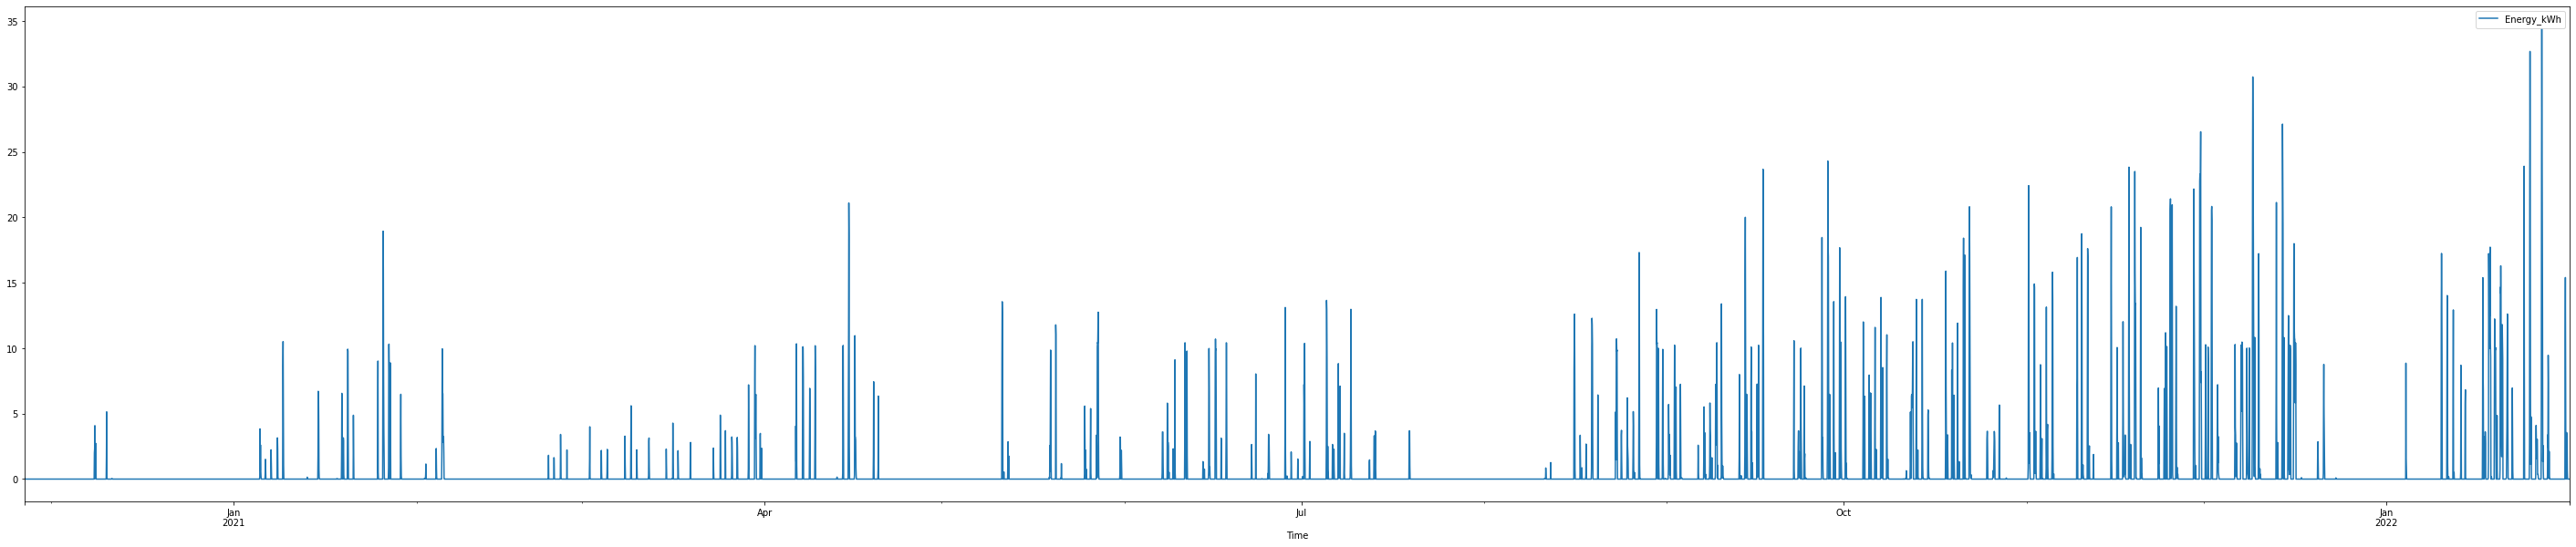

In [20]:
import matplotlib as plt
data_hourly.plot(figsize=(50,10))

# Data from HAN, before Jan 2021

In [21]:
data_old = pd.read_csv(r'../Data_HAN/Data_csv/photonMeasure.csv')
data_old

,MeasureID,UIDtag,SocketID,V1,V2,V3,I1,I2,I3,P,E,F,Time
0,2,No ID,2,228.74,227.94,228.20,4.00,0.0,0.00,0.0,0.0,50.00,1597058398
1,3,No ID,2,228.54,227.84,227.91,4.00,0.0,0.00,0.0,0.0,49.99,1597058428
2,4,No ID,2,228.68,227.94,228.05,4.00,0.0,0.00,0.0,0.0,50.01,1597058499
3,5,No ID,2,228.71,227.93,227.99,4.00,0.0,0.00,0.0,0.0,50.03,1597058530
4,6,No ID,1,228.62,227.99,228.44,0.00,0.0,0.68,0.0,0.0,50.04,1597058530
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7606,7609,No ID,3,227.13,230.11,231.29,14.27,0.0,0.00,0.0,0.0,50.05,1605268482
7607,7610,No ID,3,227.13,230.10,231.21,14.27,0.0,0.00,0.0,0.0,50.03,1605268512
7608,7611,No ID,3,226.77,229.95,230.98,14.27,0.0,0.00,0.0,0.0,50.06,1605268542
7609,7612,No ID,3,226.50,229.45,230.60,14.27,0.0,0.00,0.0,0.0,50.04,1605268573


In [22]:
data_old.drop(['P','E','F','SocketID','UIDtag','MeasureID'], axis=1, inplace=True)
data_old

,V1,V2,V3,I1,I2,I3,Time
0,228.74,227.94,228.20,4.00,0.0,0.00,1597058398
1,228.54,227.84,227.91,4.00,0.0,0.00,1597058428
2,228.68,227.94,228.05,4.00,0.0,0.00,1597058499
3,228.71,227.93,227.99,4.00,0.0,0.00,1597058530
4,228.62,227.99,228.44,0.00,0.0,0.68,1597058530
...,...,...,...,...,...,...,...
7606,227.13,230.11,231.29,14.27,0.0,0.00,1605268482
7607,227.13,230.10,231.21,14.27,0.0,0.00,1605268512
7608,226.77,229.95,230.98,14.27,0.0,0.00,1605268542
7609,226.50,229.45,230.60,14.27,0.0,0.00,1605268573


In [23]:
for i in range(len(data_old)):
    if (data_old.loc[i,'V1'] < -300) or (data_old.loc[i,'V1'] > 300):
        data_old.loc[i,'V1'] = data_old.loc[i-1,'V1']
    if (data_old.loc[i,'V2'] < -300) or (data_old.loc[i,'V2'] > 300):
        data_old.loc[i,'V2'] = data_old.loc[i-1,'V2']
    if (data_old.loc[i,'V3'] < -300) or (data_old.loc[i,'V3'] > 300):
        data_old.loc[i,'V3'] = data_old.loc[i-1,'V3']
        
    if (data_old.loc[i,'I1'] < -30) or (data_old.loc[i,'I1'] > 30):
        data_old.loc[i,'I1'] = data_old.loc[i-1,'I1']
    if (data_old.loc[i,'I2'] < -30) or (data_old.loc[i,'I2'] > 30):
        data_old.loc[i,'I2'] = data_old.loc[i-1,'I2']
    if (data_old.loc[i,'I3'] < -30) or (data_old.loc[i,'I3'] > 30):
        data_old.loc[i,'I3'] = data_old.loc[i-1,'I3']

In [24]:
data_old.loc[:,'Power'] = data_old.loc[:,'V1']*data_old.loc[:,'I1'] + data_old.loc[:,'V2']*data_old.loc[:,'I2'] + data_old.loc[:,'V3']*data_old.loc[:,'I3']

In [25]:
data_old

,V1,V2,V3,I1,I2,I3,Time,Power
0,228.74,227.94,228.20,4.00,0.0,0.00,1597058398,914.9600
1,228.54,227.84,227.91,4.00,0.0,0.00,1597058428,914.1600
2,228.68,227.94,228.05,4.00,0.0,0.00,1597058499,914.7200
3,228.71,227.93,227.99,4.00,0.0,0.00,1597058530,914.8400
4,228.62,227.99,228.44,0.00,0.0,0.68,1597058530,155.3392
...,...,...,...,...,...,...,...,...
7606,227.13,230.11,231.29,14.27,0.0,0.00,1605268482,3241.1451
7607,227.13,230.10,231.21,14.27,0.0,0.00,1605268512,3241.1451
7608,226.77,229.95,230.98,14.27,0.0,0.00,1605268542,3236.0079
7609,226.50,229.45,230.60,14.27,0.0,0.00,1605268573,3232.1550


In [26]:
data_old.loc[:,'Time'] = pd.to_datetime(data_old.loc[:,'Time'],unit='s')

In [27]:
data_old

,V1,V2,V3,I1,I2,I3,Time,Power
0,228.74,227.94,228.20,4.00,0.0,0.00,2020-08-10 11:19:58,914.9600
1,228.54,227.84,227.91,4.00,0.0,0.00,2020-08-10 11:20:28,914.1600
2,228.68,227.94,228.05,4.00,0.0,0.00,2020-08-10 11:21:39,914.7200
3,228.71,227.93,227.99,4.00,0.0,0.00,2020-08-10 11:22:10,914.8400
4,228.62,227.99,228.44,0.00,0.0,0.68,2020-08-10 11:22:10,155.3392
...,...,...,...,...,...,...,...,...
7606,227.13,230.11,231.29,14.27,0.0,0.00,2020-11-13 11:54:42,3241.1451
7607,227.13,230.10,231.21,14.27,0.0,0.00,2020-11-13 11:55:12,3241.1451
7608,226.77,229.95,230.98,14.27,0.0,0.00,2020-11-13 11:55:42,3236.0079
7609,226.50,229.45,230.60,14.27,0.0,0.00,2020-11-13 11:56:13,3232.1550


In [28]:
data_old.loc[:,'Energy_J'] = data_old.loc[:,'Power'] * 30

In [29]:
df = data_old.set_index(['Time'])

In [30]:
data_old_hourly = df[['Energy_J']].groupby(pd.Grouper(freq='1H')).sum()
data_old_hourly

,Energy_J
Time,
2020-08-10 11:00:00,3290577.753
2020-08-10 12:00:00,2774682.570
2020-08-10 13:00:00,107665.746
2020-08-10 14:00:00,1912301.382
2020-08-10 15:00:00,0.000
...,...
2022-05-06 23:00:00,0.000
2022-05-07 00:00:00,0.000
2022-05-07 01:00:00,0.000


In [31]:
data_old_hourly.loc[:,'Energy_kWh'] = data_old_hourly.loc[:,'Energy_J'] / 3600000

<AxesSubplot:xlabel='Time'>

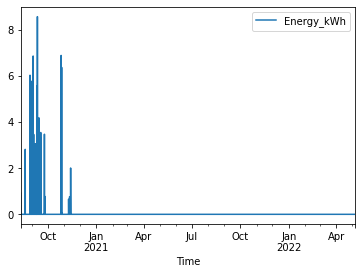

In [32]:
data_old_hourly[['Energy_kWh']].plot()

In [33]:
data_old_hourly[['Energy_kWh']]

,Energy_kWh
Time,
2020-08-10 11:00:00,0.914049
2020-08-10 12:00:00,0.770745
2020-08-10 13:00:00,0.029907
2020-08-10 14:00:00,0.531195
2020-08-10 15:00:00,0.000000
...,...
2022-05-06 23:00:00,0.000000
2022-05-07 00:00:00,0.000000
2022-05-07 01:00:00,0.000000


In [34]:
# 2020-11-26 is the first day of the new data
data_old_hourly = data_old_hourly[data_old_hourly.index < pd.to_datetime('2020-11-26 13:02:06', format='%Y-%m-%d %H:%M:%S')]

In [35]:
data_old_hourly

,Energy_J,Energy_kWh
Time,,
2020-08-10 11:00:00,3290577.753,0.914049
2020-08-10 12:00:00,2774682.570,0.770745
2020-08-10 13:00:00,107665.746,0.029907
2020-08-10 14:00:00,1912301.382,0.531195
2020-08-10 15:00:00,0.000,0.000000
...,...,...
2020-11-26 09:00:00,0.000,0.000000
2020-11-26 10:00:00,0.000,0.000000
2020-11-26 11:00:00,0.000,0.000000


<AxesSubplot:xlabel='Time'>

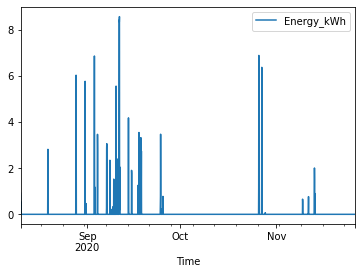

In [36]:
data_old_hourly[['Energy_kWh']].plot()

In [37]:
data_old_hourly[['Energy_kWh']]

,Energy_kWh
Time,
2020-08-10 11:00:00,0.914049
2020-08-10 12:00:00,0.770745
2020-08-10 13:00:00,0.029907
2020-08-10 14:00:00,0.531195
2020-08-10 15:00:00,0.000000
...,...
2020-11-26 09:00:00,0.000000
2020-11-26 10:00:00,0.000000
2020-11-26 11:00:00,0.000000


In [38]:
data_total = pd.concat([data_old_hourly[['Energy_kWh']], data_hourly])

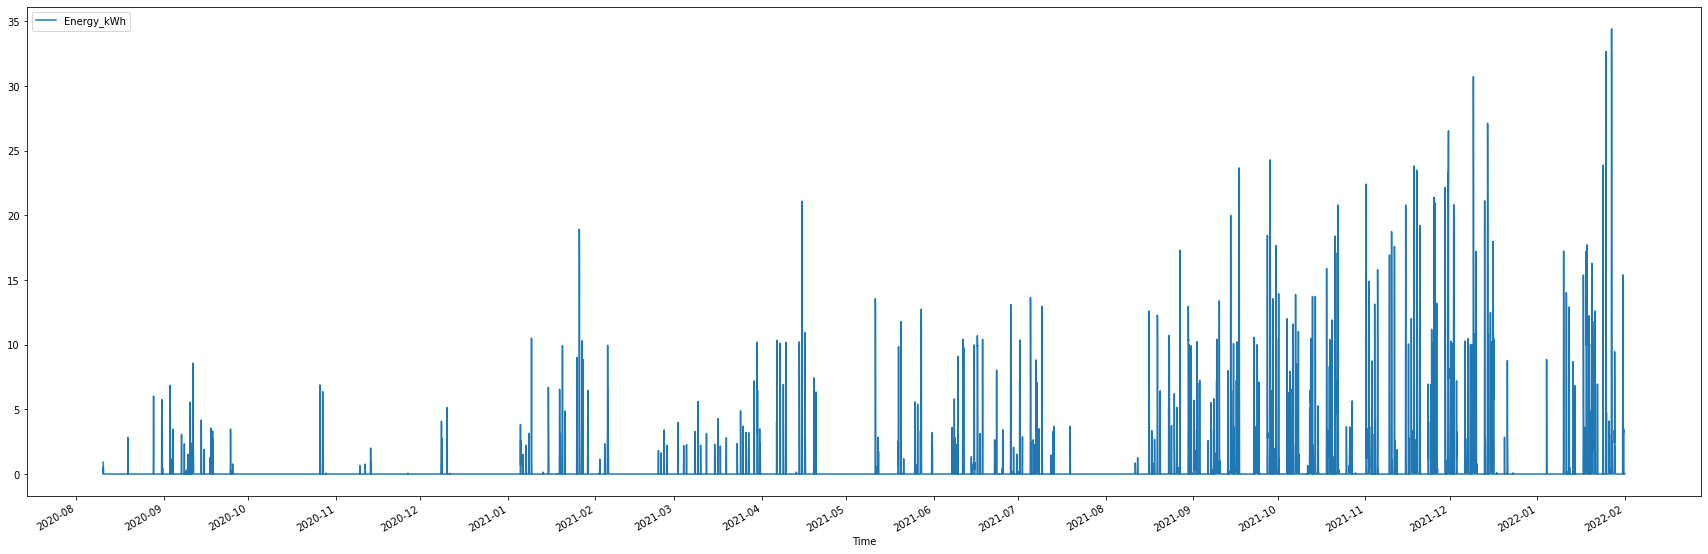

In [39]:
fig = data_total.plot(figsize=(30,10))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pylab.show()

## 29/09/2020
Do not go to HAN is there is no class/meeting
## 16/12/2020
All activities were back online
student still came to HAN for exams
## 01/02/2021
A number of students can go back to school and have some offline classes, but not all.
## 06/02/2021
Snow storm
## 25/09/2021
1.5-meter measure for higher education was left, no more group size limit -> more onsite activities

# Charging demand of the same day of week at HAN

In [40]:
data_total.loc[:, 'day_week'] = data_total.index.day_of_week

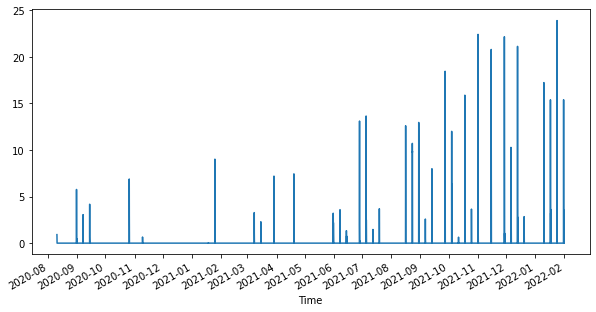

In [41]:
# Monday
fig = data_total[data_total.day_week == 0].Energy_kWh.plot(figsize=(10,5))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pylab.show()

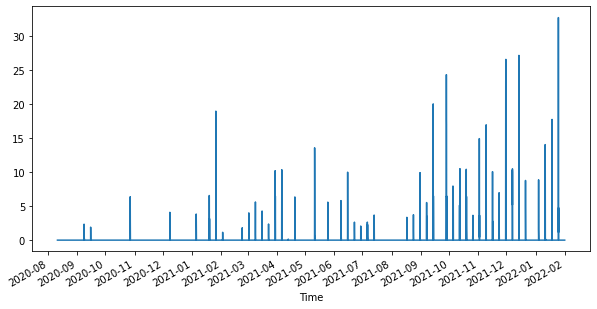

In [42]:
# Tuesday
fig = data_total[data_total.day_week == 1].Energy_kWh.plot(figsize=(10,5))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pylab.show()

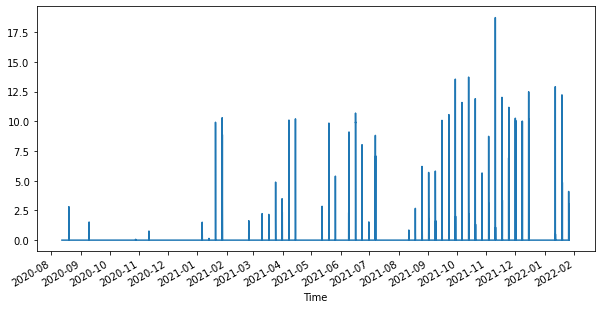

In [43]:
# Wednesday
fig = data_total[data_total.day_week == 2].Energy_kWh.plot(figsize=(10,5))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pylab.show()

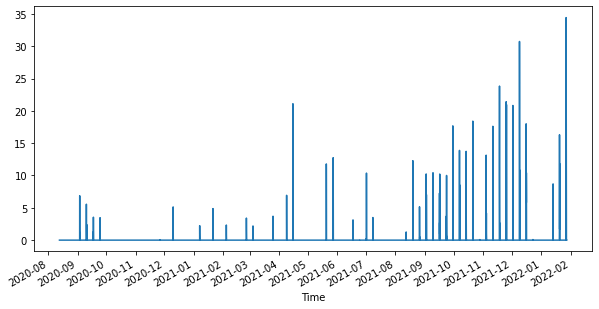

In [44]:
# Thurday
fig = data_total[data_total.day_week == 3].Energy_kWh.plot(figsize=(10,5))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pylab.show()

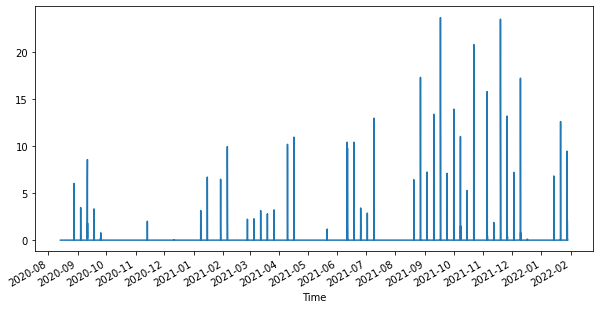

In [45]:
# Friday
fig = data_total[data_total.day_week == 4].Energy_kWh.plot(figsize=(10,5))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pylab.show()

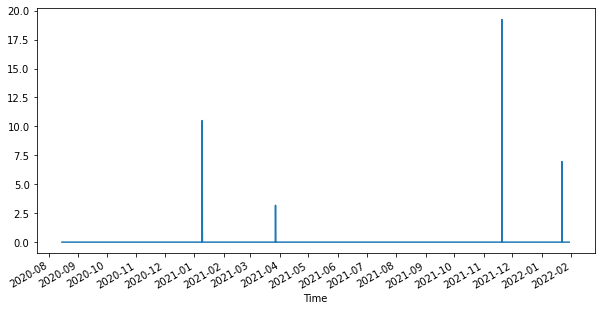

In [46]:
# Saturday
fig = data_total[data_total.day_week == 5].Energy_kWh.plot(figsize=(10,5))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pylab.show()

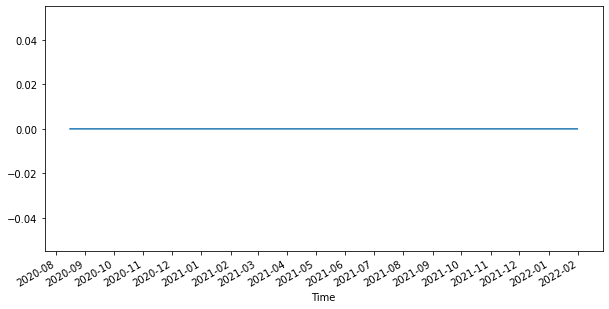

In [47]:
# Sunday
fig = data_total[data_total.day_week == 6].Energy_kWh.plot(figsize=(10,5))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pylab.show()

# ACN data
location: Caltech

timezone: GMT-8

In [48]:
import json

dataACN = json.load(open(r'../Data_ACN/acndata_sessions.json'))
data_caltech = pd.DataFrame(dataACN["_items"])

In [49]:
data_caltech

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5bc90cb9f9af8b0d7fe77cd2,0039,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932,2_39_78_362_2018-04-25 11:08:04.400812,0002,CA-496,2-39-78-362,America/Los_Angeles,None,None
1,5bc90cb9f9af8b0d7fe77cd3,0039,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013,2_39_95_27_2018-04-25 13:45:09.617470,0002,CA-319,2-39-95-27,America/Los_Angeles,None,None
2,5bc90cb9f9af8b0d7fe77cd4,0039,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257,2_39_79_380_2018-04-25 13:45:49.962001,0002,CA-489,2-39-79-380,America/Los_Angeles,None,None
3,5bc90cb9f9af8b0d7fe77cd5,0039,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",5.177,2_39_79_379_2018-04-25 14:37:06.460772,0002,CA-327,2-39-79-379,America/Los_Angeles,None,None
4,5bc90cb9f9af8b0d7fe77cd6,0039,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",10.119,2_39_79_381_2018-04-25 14:40:33.638896,0002,CA-490,2-39-79-381,America/Los_Angeles,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31419,61550519f9af8b76960e169a,0039,"Mon, 13 Sep 2021 21:12:53 GMT","Tue, 14 Sep 2021 00:25:36 GMT","Mon, 13 Sep 2021 21:41:31 GMT",2.285,2_39_89_25_2021-09-13 21:12:53.318460,0002,CA-315,2-39-89-25,America/Los_Angeles,000000431,"[{'WhPerMile': 286, 'kWhRequested': 28.6, 'mil..."
31420,61550519f9af8b76960e169b,0039,"Mon, 13 Sep 2021 21:17:04 GMT","Tue, 14 Sep 2021 01:01:49 GMT","Mon, 13 Sep 2021 23:18:07 GMT",6.715,2_39_123_23_2021-09-13 21:16:44.026068,0002,CA-313,2-39-123-23,America/Los_Angeles,000006481,"[{'WhPerMile': 460, 'kWhRequested': 11.5, 'mil..."
31421,61550519f9af8b76960e169c,0039,"Mon, 13 Sep 2021 22:33:07 GMT","Mon, 13 Sep 2021 23:06:55 GMT",None,17.720,2_39_81_4550_2021-09-13 22:33:04.543952,0002,11900388,2-39-81-4550,America/Los_Angeles,000003905,"[{'WhPerMile': 300, 'kWhRequested': 30.0, 'mil..."
31422,61550519f9af8b76960e169d,0039,"Mon, 13 Sep 2021 23:11:12 GMT","Tue, 14 Sep 2021 01:43:11 GMT","Tue, 14 Sep 2021 00:13:35 GMT",2.018,2_39_91_437_2021-09-13 23:10:59.528292,0002,CA-317,2-39-91-437,America/Los_Angeles,000001082,"[{'WhPerMile': 290, 'kWhRequested': 5.8, 'mile..."


In [50]:
data_caltech.loc[605, :]

_id                               5bc917d0f9af8b0dc677b8d1
clusterID                                             0039
connectionTime               Mon, 07 May 2018 20:47:49 GMT
disconnectTime               Tue, 08 May 2018 01:32:46 GMT
doneChargingTime             Mon, 07 May 2018 20:47:49 GMT
kWhDelivered                                          3.87
sessionID           2_39_89_439_2018-05-07 20:47:49.332393
siteID                                                0002
spaceID                                             CA-501
stationID                                      2-39-89-439
timezone                               America/Los_Angeles
userID                                                None
userInputs                                            None
Name: 605, dtype: object

In [51]:
data_caltech.drop(['_id','clusterID','sessionID','siteID','spaceID','stationID','timezone','userID','userInputs'], axis=1, inplace=True)

In [52]:
data_caltech

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered
0,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932
1,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013
2,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257
3,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",5.177
4,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",10.119
...,...,...,...,...
31419,"Mon, 13 Sep 2021 21:12:53 GMT","Tue, 14 Sep 2021 00:25:36 GMT","Mon, 13 Sep 2021 21:41:31 GMT",2.285
31420,"Mon, 13 Sep 2021 21:17:04 GMT","Tue, 14 Sep 2021 01:01:49 GMT","Mon, 13 Sep 2021 23:18:07 GMT",6.715
31421,"Mon, 13 Sep 2021 22:33:07 GMT","Mon, 13 Sep 2021 23:06:55 GMT",None,17.720
31422,"Mon, 13 Sep 2021 23:11:12 GMT","Tue, 14 Sep 2021 01:43:11 GMT","Tue, 14 Sep 2021 00:13:35 GMT",2.018


If the charging process is not finished, the end of the session is the disconnectTime

In [53]:
for i in range(len(data_caltech)):
    if data_caltech.iloc[i]['doneChargingTime'] is None:
        data_caltech.loc[i, 'doneChargingTime'] = data_caltech.iloc[i]['disconnectTime']

In [54]:
data_caltech.drop(['disconnectTime'], axis=1, inplace=True)
data_caltech

,connectionTime,doneChargingTime,kWhDelivered
0,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932
1,"Wed, 25 Apr 2018 13:45:10 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013
2,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257
3,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 16:05:22 GMT",5.177
4,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 17:40:30 GMT",10.119
...,...,...,...
31419,"Mon, 13 Sep 2021 21:12:53 GMT","Mon, 13 Sep 2021 21:41:31 GMT",2.285
31420,"Mon, 13 Sep 2021 21:17:04 GMT","Mon, 13 Sep 2021 23:18:07 GMT",6.715
31421,"Mon, 13 Sep 2021 22:33:07 GMT","Mon, 13 Sep 2021 23:06:55 GMT",17.720
31422,"Mon, 13 Sep 2021 23:11:12 GMT","Tue, 14 Sep 2021 00:13:35 GMT",2.018


In [55]:
def toTimeStamp(string):
    return pd.Timestamp(string[4:-4])

In [56]:
data_caltech['connectionTime'] = data_caltech['connectionTime'].map(toTimeStamp)
data_caltech['doneChargingTime'] = data_caltech['doneChargingTime'].map(toTimeStamp)
data_caltech

,connectionTime,doneChargingTime,kWhDelivered
0,2018-04-25 11:08:04,2018-04-25 13:21:10,7.932
1,2018-04-25 13:45:10,2018-04-25 16:44:15,10.013
2,2018-04-25 13:45:50,2018-04-25 14:51:44,5.257
3,2018-04-25 14:37:06,2018-04-25 16:05:22,5.177
4,2018-04-25 14:40:34,2018-04-25 17:40:30,10.119
...,...,...,...
31419,2021-09-13 21:12:53,2021-09-13 21:41:31,2.285
31420,2021-09-13 21:17:04,2021-09-13 23:18:07,6.715
31421,2021-09-13 22:33:07,2021-09-13 23:06:55,17.720
31422,2021-09-13 23:11:12,2021-09-14 00:13:35,2.018


The energy delivered per hour is calculated by $\frac{kWhDelivered}{duration}$

In [57]:
for i in range(len(data_caltech)):
    data_caltech.loc[i,'duration'] = (data_caltech.iloc[i]['doneChargingTime'] - data_caltech.iloc[i]['connectionTime']).total_seconds()/3600

In [58]:
data_caltech

,connectionTime,doneChargingTime,kWhDelivered,duration
0,2018-04-25 11:08:04,2018-04-25 13:21:10,7.932,2.218333
1,2018-04-25 13:45:10,2018-04-25 16:44:15,10.013,2.984722
2,2018-04-25 13:45:50,2018-04-25 14:51:44,5.257,1.098333
3,2018-04-25 14:37:06,2018-04-25 16:05:22,5.177,1.471111
4,2018-04-25 14:40:34,2018-04-25 17:40:30,10.119,2.998889
...,...,...,...,...
31419,2021-09-13 21:12:53,2021-09-13 21:41:31,2.285,0.477222
31420,2021-09-13 21:17:04,2021-09-13 23:18:07,6.715,2.017500
31421,2021-09-13 22:33:07,2021-09-13 23:06:55,17.720,0.563333
31422,2021-09-13 23:11:12,2021-09-14 00:13:35,2.018,1.039722


In [59]:
data_caltech.loc[:, 'perHour'] = data_caltech.loc[:, 'kWhDelivered']/data_caltech.loc[:, 'duration']

In [60]:
data_caltech

,connectionTime,doneChargingTime,kWhDelivered,duration,perHour
0,2018-04-25 11:08:04,2018-04-25 13:21:10,7.932,2.218333,3.575657
1,2018-04-25 13:45:10,2018-04-25 16:44:15,10.013,2.984722,3.354751
2,2018-04-25 13:45:50,2018-04-25 14:51:44,5.257,1.098333,4.786343
3,2018-04-25 14:37:06,2018-04-25 16:05:22,5.177,1.471111,3.519109
4,2018-04-25 14:40:34,2018-04-25 17:40:30,10.119,2.998889,3.374250
...,...,...,...,...,...
31419,2021-09-13 21:12:53,2021-09-13 21:41:31,2.285,0.477222,4.788126
31420,2021-09-13 21:17:04,2021-09-13 23:18:07,6.715,2.017500,3.328377
31421,2021-09-13 22:33:07,2021-09-13 23:06:55,17.720,0.563333,31.455621
31422,2021-09-13 23:11:12,2021-09-14 00:13:35,2.018,1.039722,1.940903


## Turn the ACN data to the hourly data

In [61]:
from datetime import datetime, timedelta

In [63]:
times = pd.date_range(datetime.strptime('2018-04-25 11:00:00', '%Y-%m-%d %H:%M:%S'), datetime.strptime('2021-09-14 03:00:00', '%Y-%m-%d %H:%M:%S'), freq='H')

In [64]:
times

DatetimeIndex(['2018-04-25 11:00:00', '2018-04-25 12:00:00',
               '2018-04-25 13:00:00', '2018-04-25 14:00:00',
               '2018-04-25 15:00:00', '2018-04-25 16:00:00',
               '2018-04-25 17:00:00', '2018-04-25 18:00:00',
               '2018-04-25 19:00:00', '2018-04-25 20:00:00',
               ...
               '2021-09-13 18:00:00', '2021-09-13 19:00:00',
               '2021-09-13 20:00:00', '2021-09-13 21:00:00',
               '2021-09-13 22:00:00', '2021-09-13 23:00:00',
               '2021-09-14 00:00:00', '2021-09-14 01:00:00',
               '2021-09-14 02:00:00', '2021-09-14 03:00:00'],
              dtype='datetime64[ns]', length=29705, freq='H')

In [65]:
import numpy as np

In [84]:
data_refined = pd.DataFrame({'time':times, 'Energy_kWh':np.zeros(len(times))})
data_refined.set_index('time', inplace=True)

In [85]:
data_refined

,Energy_kWh
time,
2018-04-25 11:00:00,0.0
2018-04-25 12:00:00,0.0
2018-04-25 13:00:00,0.0
2018-04-25 14:00:00,0.0
2018-04-25 15:00:00,0.0
...,...
2021-09-13 23:00:00,0.0
2021-09-14 00:00:00,0.0
2021-09-14 01:00:00,0.0


In [88]:
for i in range(len(data_caltech)):
    head = data_caltech.loc[i, 'connectionTime']
    tail = data_caltech.loc[i, 'connectionTime'].replace(second=0, minute=0) + timedelta(seconds = 3600)
    while data_caltech.loc[i, 'doneChargingTime'] > tail:
        data_refined.loc[str(head.replace(second=0, minute=0)), 'Energy_kWh'] += (((tail-head).total_seconds()/3600) * data_caltech.loc[i, 'perHour'])
        head = tail
        tail = tail + timedelta(seconds = 3600)
    tail = data_caltech.loc[i, 'doneChargingTime']
    data_refined.loc[str(tail.replace(second=0, minute=0)), 'Energy_kWh'] += (((tail-head).total_seconds()/3600) * data_caltech.loc[i, 'perHour'])

/tmp/ipykernel_28492/1517095482.py:9: RuntimeWarning: invalid value encountered in double_scalars
  data_refined.loc[str(tail.replace(second=0, minute=0)), 'Energy_kWh'] += (((tail-head).total_seconds()/3600) * data_caltech.loc[i, 'perHour'])


In [90]:
data_refined[data_refined['Energy_kWh'].isnull()]

,Energy_kWh
time,
2018-05-07 20:00:00,NaN


In [91]:
data_refined.loc['2018-05-07 20:00:00', 'Energy_kWh'] = 0

<AxesSubplot:xlabel='time'>

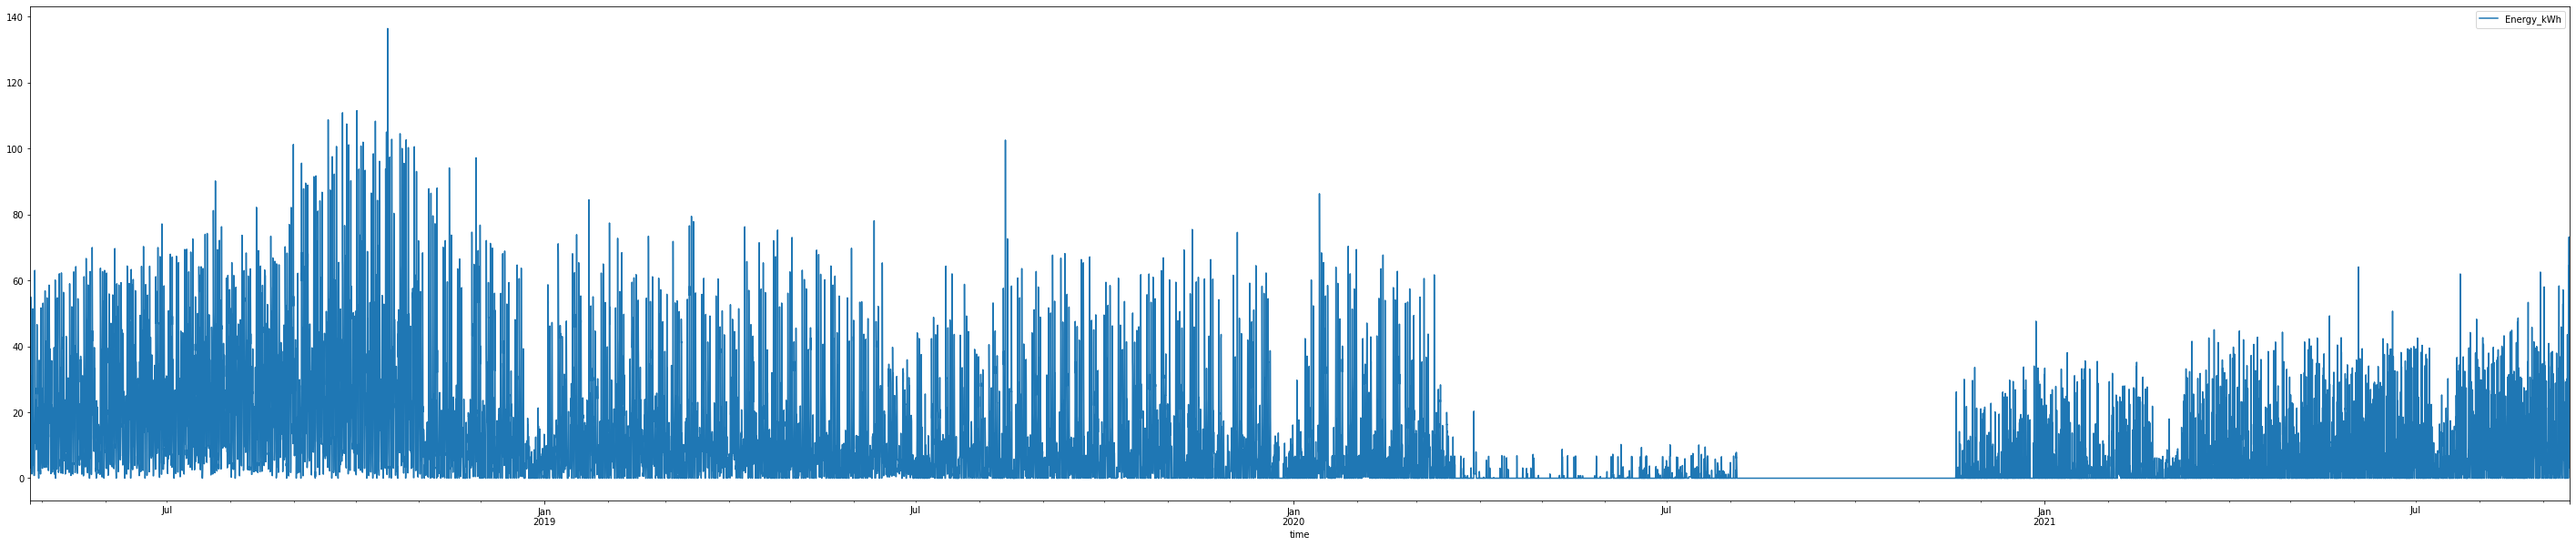

In [97]:
data_refined.plot(figsize=(50,10))

In [96]:
data_refined

,Energy_kWh
time,
2018-04-25 11:00:00,3.094930
2018-04-25 12:00:00,3.575657
2018-04-25 13:00:00,3.220890
2018-04-25 14:00:00,12.224048
2018-04-25 15:00:00,36.981414
...,...
2021-09-13 23:00:00,26.987689
2021-09-14 00:00:00,5.856552
2021-09-14 01:00:00,4.586113
